# Well-log value probability

In this notebook we will read in a well log `las` file, convert it to a `pandas` `DataFrame` and calculate the marginal, joint, and conditional probabilities for two specific 'events'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
import seaborn as sns; sns.set()
%matplotlib inline

Here we read in the well-log file using `lasio`

In [2]:
well = lasio.read(r'T13309.las')

Plot it up to see how the deep resistivity and gamma-ray values vary downhole

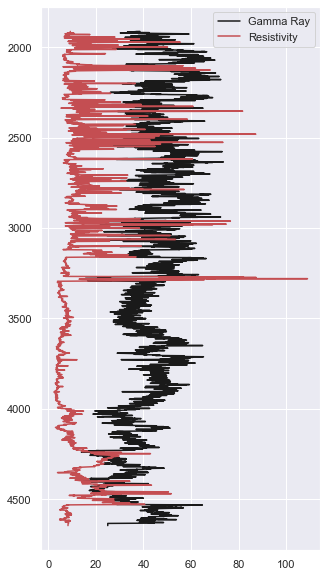

In [3]:
plt.figure(figsize=(5,10))
plt.plot(well.curves.GR.data, well.curves.DEPT.data, label='Gamma Ray', c='k')
plt.plot(well.curves.AHT90.data, well.curves.DEPT.data, label='Resistivity', c='r')
ax = plt.gca()
ax.invert_yaxis()
ax.legend()

Now we convert it to a `DataFrame`

In [4]:
dataframe = well.df()
dataframe.head()

,AHT10,AHT20,AHT30,AHT60,AHT90,AHTCO60,AHTCO90,DPHZ,DSOZ,DT,...,HTEM,ITT,NPOR,PEFZ,RSOZ,RXOZ,SDEV,SP,SPHI,RHOZ
DEPT,,,,,,,,,,,,,,,,,,,,,
4647.0,7.9474,7.7832,7.8743,8.1251,8.2127,123.0750,121.7627,0.0779,0.5004,98.7544,...,88.6028,0.0000,0.6244,4.3179,0.1670,6.0978,3.2970,0.0000,0.2969,2.5215
4646.5,7.9475,7.7832,7.8747,8.1248,8.2141,123.0797,121.7420,0.0850,0.4983,98.7544,...,88.6028,0.0001,0.6244,4.4494,0.1669,6.0968,3.2970,0.3125,0.2969,2.5097
4646.0,7.9477,7.7831,7.8750,8.1245,8.2156,123.0838,121.7204,0.0990,0.4944,98.7544,...,88.6028,0.0001,0.6241,4.6198,0.1668,6.0968,3.2970,0.6875,0.2969,2.4866
4645.5,7.9477,7.7831,7.8753,8.1243,8.2171,123.0874,121.6980,0.1127,0.4903,98.7544,...,88.6028,0.0002,0.6244,4.8119,0.1669,6.0967,3.2976,1.3125,0.2969,2.4640
4645.0,7.9478,7.7831,7.8756,8.1242,8.2186,123.0886,121.6747,0.1324,0.4825,98.7544,...,88.6028,0.0002,0.6244,5.0141,0.1669,6.0967,3.2979,0.5000,0.2969,2.4315


Next we define Event A as when `GR` gamma-ray values are greater than 20 but less than 45 API. We also define Event B as when `AHT90` deep-resistivity values are greater 20 but less than 30 ohm meters.

Let's plot up the marginal and joint distributions using `seaborn` and visualize the two events on the plot being the area inside the red and black box

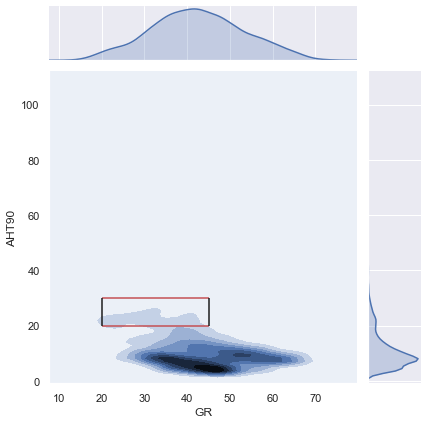

In [5]:
plot = sns.jointplot(dataframe.GR, dataframe.AHT90, kind='kde')
plot.ax_joint.hlines(20,20,45, 'r')
plot.ax_joint.hlines(30,20,45, 'r')
plot.ax_joint.vlines(20,20,30, 'k')
plot.ax_joint.vlines(45,20,30, 'k')

Now we are going to calculate the marginal probability of Event A $P(A)$. To do that we need to count the number of times in the `DataFrame` where `GR` is greater than 20 and also less than 45. We take that count and divide it by the total number of entries in the `DataFrame`

In [6]:
event_a = dataframe[(20 < dataframe['GR']) & (dataframe['GR'] < 40)]
prob_a = len(event_a)/len(dataframe)*100
print('The probability of gamma between 20 and 45 is %s percent' %np.round(prob_a,2))

The probability of gamme between 20 and 45 is 40.5 percent


Next we calculate the marginal probability of Event B $P(B)$. Just like with Event A let's count the number of times in the `DataFrame` where `AHT90` is greater than 20 but less than 30 and divide it by the total number of entries in the `DataFrame`

In [7]:
event_b = dataframe[(dataframe['AHT90']> 20) & (dataframe['AHT90']<30)]
prob_b = len(event_b)/len(dataframe)*100
print('The probability of resistivity between 20 and 30 is %s percent' %np.round(prob_b,1))

The probability of resistivity between 20 and 30 is 10.4 percent


What about the joint probability $P(A \cap B)$ of having a `GR` value between 20 and 45, and having an `AHT90` value greater than 20 but less than 30?

In [8]:
a_and_b = dataframe[(20 < dataframe['GR']) & (dataframe['GR'] < 45) & (dataframe['AHT90']> 20) & (dataframe['AHT90']<30)]
joint_prob = len(a_and_b)/len(dataframe)*100
print('The joint probability is %s percent' %np.round(joint_prob,1))

The joint probability is 9.2 percent


What about the conditional probabilities of our resistivity being between 20 and 30 given that gamma ray is between 20 and 45?

In [9]:
print('The probability of resistivity between 20 and 30 given that gamma ray is between 20 and 45 is %s percent' %np.round(joint_prob/prob_a, 3))

The probability of resistivity between 20 and 30 given that gamma ray is between 20 and 45 is 0.227 percent


In [10]:
print('The probability of gamma between 20 and 45 given that resistivity is between 20 and 30 is %s percent' %np.round(joint_prob/prob_b, 3))

The probability of gamma between 20 and 45 given that resistivity is between 20 and 30 is 0.889 percent


Next, compare the product of the probability of Event A and Event B to the joint probability to see if they are independent

In [11]:
if (prob_a*prob_b)==joint_prob:
    print('Low gamma-ray values and high resistivity values are independent')
else:
    print('Low gamma-ray values and high resistivity values are NOT independent')

Low gamma-ray values and high resistivity values are NOT independent
